# 4. PV_Power_Analysis

#### 월별 태양광 발전량

In [2]:
# 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# '-'(마이너스) 기호 깨짐 예방
plt.rcParams['axes.unicode_minus'] = False

# jupyter notebook 에서 창 내부에 출력
%matplotlib inline

# 별도 창에 출력
# %matplotlib tk

# 설비용량: 200kW

## 1. 데이터 읽기

In [6]:
df1 = pd.read_csv('./datasets/한국남부발전(주)_신인천소내 태양광발전실적_2021_1H_.csv',encoding='cp949')
df1

,datetime,PV
0,2021-01-01 00:00:00,0.0
1,2021-01-01 01:00:00,0.0
2,2021-01-01 02:00:00,0.0
3,2021-01-01 03:00:00,0.0
4,2021-01-01 04:00:00,0.0
...,...,...
8755,2021-12-31 19:00:00,0.0
8756,2021-12-31 20:00:00,0.0
8757,2021-12-31 21:00:00,0.0
8758,2021-12-31 22:00:00,0.0


In [9]:
df2 = pd.read_csv('./datasets/OBS_ASOS_TIM_2021_1H_Tem_Irr.csv',encoding='cp949')
df2

,일시,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm)
0,2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0
1,2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0
2,2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0
3,2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0
4,2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0
8756,2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0
8757,2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0
8758,2021-12-31 22:00:00,-7.2,0.0,0.0,0.0,0.0


## 2. 데이터 준비

#### 시계열 데이터로 변환

In [11]:
df1.index = pd.to_datetime(df1['datetime'])
df1 = df1.drop(['datetime'], axis=1)
df1

,PV
datetime,
2021-01-01 00:00:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0
...,...
2021-12-31 19:00:00,0.0
2021-12-31 20:00:00,0.0
2021-12-31 21:00:00,0.0


In [12]:
df2.index = pd.to_datetime(df2['일시'])
df2 = df2.drop(['일시'], axis=1)
df2

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm)
일시,,,,,
2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0
2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0


#### 데이터 프레임 통합

In [13]:
#컬럼추가
df2['PV'] = df1['PV']
df2

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
일시,,,,,,
2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0,0.0
2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0,0.0


In [14]:
#메모리가 겹치는 일이 없도록 복사본을 이용
df = df2.copy()
df

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm),PV
일시,,,,,,
2021-01-01 00:00:00,-7.5,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,-7.8,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,-7.8,0.0,2.0,0.0,0.0,0.0
2021-01-01 03:00:00,-8.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,-7.9,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-31 19:00:00,-5.4,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,-5.8,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,-6.7,0.0,0.0,0.0,0.0,0.0


#### 시각화

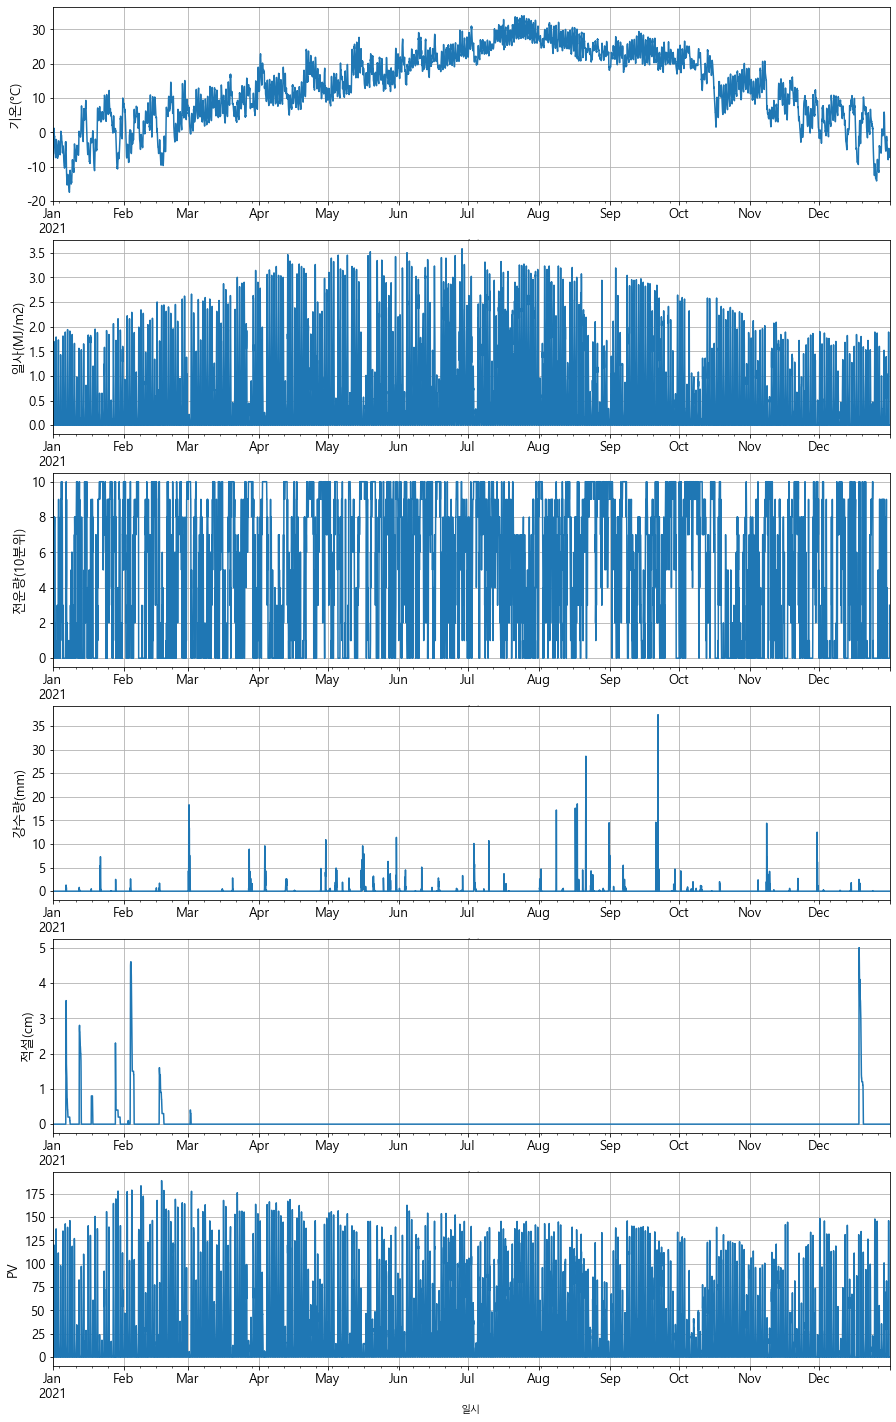

In [15]:
plt.subplots(6,1)
for i in range(6):
    ax = plt.subplot(6,1,i+1)
    df.iloc[:,i].plot(figsize=(15,25), fontsize = 13)
    plt.grid()
    plt.ylabel(df.columns[i], fontsize = 13)

#### csv 파일로 저장

In [16]:
df.to_csv('한국남부발전(주)_신인천소내 태양광발전실적_기상_2021_1H_.csv', encoding='cp949')

## 3. PV 발전량 분석

### 3.1 월별 발전량 분석

#### 월별 발전량 계산

In [17]:
PV_Monthly_Sum = df['PV'].resample('M').sum()
PV_Monthly_Sum

일시
2021-01-31    15906.484
2021-02-28    20593.513
2021-03-31    24103.523
2021-04-30    24375.102
2021-05-31    21808.537
2021-06-30    25121.477
2021-07-31    26322.998
2021-08-31    20693.428
2021-09-30    21326.921
2021-10-31    17546.631
2021-11-30    13765.981
2021-12-31    14726.404
Freq: M, Name: PV, dtype: float64

#### 새로운 데이터프레임 만들기

In [18]:
df_PV_Monthly = pd.DataFrame(PV_Monthly_Sum.values, index=PV_Monthly_Sum.index, columns=['발전량'])
df_PV_Monthly

,발전량
일시,
2021-01-31,15906.484
2021-02-28,20593.513
2021-03-31,24103.523
2021-04-30,24375.102
2021-05-31,21808.537
2021-06-30,25121.477
2021-07-31,26322.998
2021-08-31,20693.428
2021-09-30,21326.921


#### 시각화

Text(0.5, 1.0, '월별 발전량')

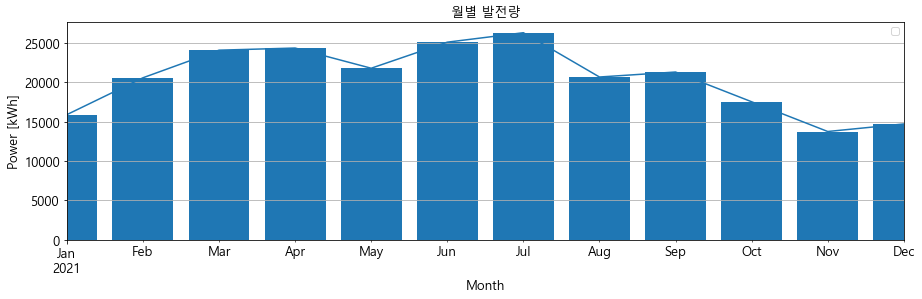

In [19]:
x = df_PV_Monthly['발전량']
x.plot(figsize=(15,4), fontsize = 13).bar(x=x.index, height=x.values)
plt.grid()
plt.legend([])
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Power [kWh]', fontsize = 13)
plt.title('월별 발전량', fontsize = 13)

### 3.2 월별 일평균 발전량 분석

#### 월별 일평균 발전량 계산

In [20]:
df['PV'].resample('M').mean()

일시
2021-01-31    21.379683
2021-02-28    30.645109
2021-03-31    32.397208
2021-04-30    33.854308
2021-05-31    29.312550
2021-06-30    34.890940
2021-07-31    35.380374
2021-08-31    27.813747
2021-09-30    29.620724
2021-10-31    23.584181
2021-11-30    19.119418
2021-12-31    19.793554
Freq: M, Name: PV, dtype: float64

In [21]:
PV_Monthly_Mean = df['PV'].resample('D').sum().resample('M').mean()
PV_Monthly_Mean

일시
2021-01-31    513.112387
2021-02-28    735.482607
2021-03-31    777.533000
2021-04-30    812.503400
2021-05-31    703.501194
2021-06-30    837.382567
2021-07-31    849.128968
2021-08-31    667.529935
2021-09-30    710.897367
2021-10-31    566.020355
2021-11-30    458.866033
2021-12-31    475.045290
Freq: M, Name: PV, dtype: float64

#### 데이터프레임에 추가

In [22]:
df_PV_Monthly['일평균 발전량'] = df_PV_Monthly
df_PV_Monthly

,발전량,일평균 발전량
일시,,
2021-01-31,15906.484,15906.484
2021-02-28,20593.513,20593.513
2021-03-31,24103.523,24103.523
2021-04-30,24375.102,24375.102
2021-05-31,21808.537,21808.537
2021-06-30,25121.477,25121.477
2021-07-31,26322.998,26322.998
2021-08-31,20693.428,20693.428
2021-09-30,21326.921,21326.921


#### 시각화

Text(0.5, 1.0, '월별 일평균 발전량')

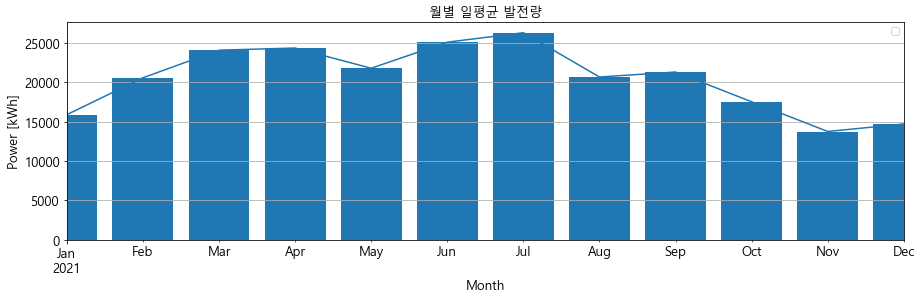

In [23]:
x = df_PV_Monthly['일평균 발전량']
x.plot(figsize=(15,4), fontsize = 13).bar(x=x.index, height=x.values)
plt.grid()
plt.legend([])
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Power [kWh]', fontsize = 13)
plt.title('월별 일평균 발전량', fontsize = 13)

### 3.3 월별 일평균 발전시간횟수 분석

#### 월별 일평균 발전시간횟수 계산

In [24]:
df[df['PV'] > 0]['PV'].head(24)

일시
2021-01-01 09:00:00      3.568
2021-01-01 10:00:00     46.620
2021-01-01 11:00:00     97.843
2021-01-01 12:00:00     96.059
2021-01-01 13:00:00    120.044
2021-01-01 14:00:00    111.366
2021-01-01 15:00:00     27.432
2021-01-01 16:00:00     14.391
2021-01-01 17:00:00      5.689
2021-01-02 09:00:00      4.146
2021-01-02 10:00:00     54.502
2021-01-02 11:00:00    103.870
2021-01-02 12:00:00    131.494
2021-01-02 13:00:00    137.207
2021-01-02 14:00:00    121.900
2021-01-02 15:00:00    100.881
2021-01-02 16:00:00     63.204
2021-01-02 17:00:00     10.703
2021-01-02 18:00:00      0.096
2021-01-03 09:00:00      4.026
2021-01-03 10:00:00     48.403
2021-01-03 11:00:00     94.782
2021-01-03 12:00:00    111.463
2021-01-03 13:00:00     82.850
Name: PV, dtype: float64

In [30]:
df[df['PV'] > 0]['PV'].resample('D').count()

일시
2021-01-01     9
2021-01-02    10
2021-01-03    10
2021-01-04    10
2021-01-05    10
              ..
2021-12-27    10
2021-12-28     9
2021-12-29    10
2021-12-30    10
2021-12-31     9
Freq: D, Name: PV, Length: 365, dtype: int64

In [32]:
PV_Monthly_count = df[df['PV'] > 0]['PV'].resample('D').count().resample('M').mean()
PV_Monthly_count

일시
2021-01-31     9.870968
2021-02-28    10.785714
2021-03-31    11.967742
2021-04-30    12.700000
2021-05-31    13.580645
2021-06-30    14.466667
2021-07-31    14.096774
2021-08-31    13.193548
2021-09-30    12.533333
2021-10-31    10.967742
2021-11-30    10.233333
2021-12-31     8.967742
Freq: M, Name: PV, dtype: float64

#### 데이터프레임에 추가

In [31]:
df_PV_Monthly['일평균 발전시간횟수'] = PV_Monthly_count
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수
일시,,,
2021-01-31,15906.484,15906.484,9.870968
2021-02-28,20593.513,20593.513,10.785714
2021-03-31,24103.523,24103.523,11.967742
2021-04-30,24375.102,24375.102,12.700000
2021-05-31,21808.537,21808.537,13.580645
2021-06-30,25121.477,25121.477,14.466667
2021-07-31,26322.998,26322.998,14.096774
2021-08-31,20693.428,20693.428,13.193548
2021-09-30,21326.921,21326.921,12.533333


#### 시각화

Text(0.5, 1.0, '월별 일평균 발전시간횟수')

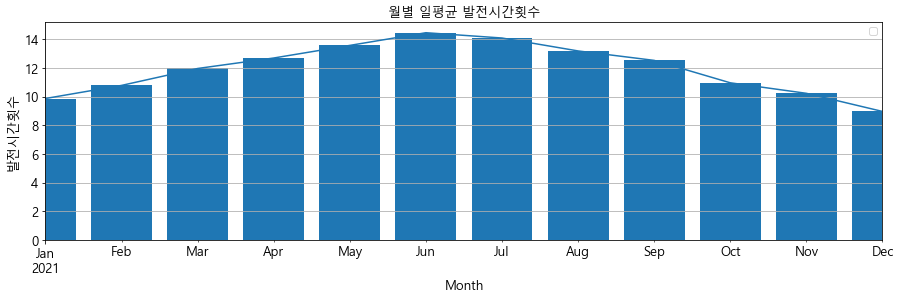

In [29]:
x = df_PV_Monthly['일평균 발전시간횟수']
x.plot(figsize=(15,4), fontsize = 13).bar(x=x.index, height=x.values)
plt.grid()
plt.legend([])
plt.xlabel('Month', fontsize = 13)
plt.ylabel('발전시간횟수', fontsize = 13)
plt.title('월별 일평균 발전시간횟수', fontsize = 13)

### 3.4 월별 일평균 발전시간 분석

#### 월별 일평균 발전시간 계산 
발전시간 = 발전량/설비용량(200kW)

In [33]:
# 설비용량
Capacity = 200

# 일일 발전량
PV_Daily_Sum = df['PV'].resample('D').sum()

# 발전시간
PV_Monthly_generation_time_Monthly = (PV_Daily_Sum/Capacity).resample('M').mean()
PV_Monthly_generation_time_Monthly

일시
2021-01-31    2.565562
2021-02-28    3.677413
2021-03-31    3.887665
2021-04-30    4.062517
2021-05-31    3.517506
2021-06-30    4.186913
2021-07-31    4.245645
2021-08-31    3.337650
2021-09-30    3.554487
2021-10-31    2.830102
2021-11-30    2.294330
2021-12-31    2.375226
Freq: M, Name: PV, dtype: float64

#### 데이터프레임에 추가

In [34]:
df_PV_Monthly['일평균 발전시간'] = PV_Monthly_generation_time_Monthly
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수,일평균 발전시간
일시,,,,
2021-01-31,15906.484,15906.484,9.870968,2.565562
2021-02-28,20593.513,20593.513,10.785714,3.677413
2021-03-31,24103.523,24103.523,11.967742,3.887665
2021-04-30,24375.102,24375.102,12.700000,4.062517
2021-05-31,21808.537,21808.537,13.580645,3.517506
2021-06-30,25121.477,25121.477,14.466667,4.186913
2021-07-31,26322.998,26322.998,14.096774,4.245645
2021-08-31,20693.428,20693.428,13.193548,3.337650
2021-09-30,21326.921,21326.921,12.533333,3.554487


Text(0.5, 1.0, '월별 일평균 발전시간')

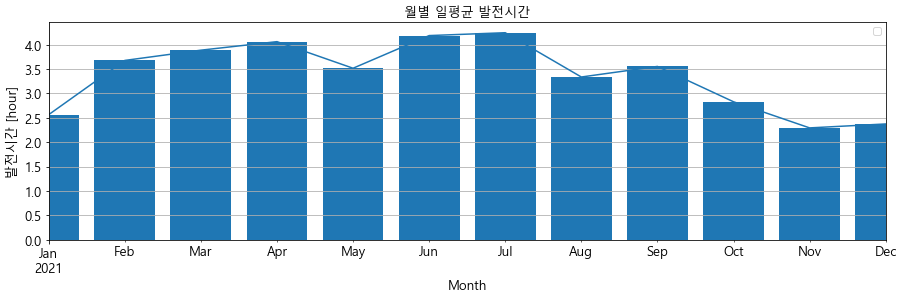

In [35]:
x = df_PV_Monthly['일평균 발전시간']
x.plot(figsize=(15,4), fontsize = 13).bar(x=x.index, height=x.values)
plt.grid()
plt.legend([])
plt.xlabel('Month', fontsize = 13)
plt.ylabel('발전시간 [hour]', fontsize = 13)
plt.title('월별 일평균 발전시간', fontsize = 13)

### 3.5 월별 이용률분석

### 월별 이용률 계산
* 발전이용률 = 발전량 / 발전가능량
* 발전가능량 = 설비용량 X 가동일 X 24(시간)
* 3.5이용률

#### 가동일 계산

In [37]:
# 가동일
df_PV_Monthly['가동일'] = df_PV_Monthly.index.day
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수,일평균 발전시간,가동일
일시,,,,,
2021-01-31,15906.484,15906.484,9.870968,2.565562,31
2021-02-28,20593.513,20593.513,10.785714,3.677413,28
2021-03-31,24103.523,24103.523,11.967742,3.887665,31
2021-04-30,24375.102,24375.102,12.700000,4.062517,30
2021-05-31,21808.537,21808.537,13.580645,3.517506,31
2021-06-30,25121.477,25121.477,14.466667,4.186913,30
2021-07-31,26322.998,26322.998,14.096774,4.245645,31
2021-08-31,20693.428,20693.428,13.193548,3.337650,31
2021-09-30,21326.921,21326.921,12.533333,3.554487,30


In [38]:
# 발전가능량
df_PV_Monthly['발전 가능량'] = Capacity*df_PV_Monthly['가동일']*24
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수,일평균 발전시간,가동일,발전 가능량
일시,,,,,,
2021-01-31,15906.484,15906.484,9.870968,2.565562,31,148800
2021-02-28,20593.513,20593.513,10.785714,3.677413,28,134400
2021-03-31,24103.523,24103.523,11.967742,3.887665,31,148800
2021-04-30,24375.102,24375.102,12.700000,4.062517,30,144000
2021-05-31,21808.537,21808.537,13.580645,3.517506,31,148800
2021-06-30,25121.477,25121.477,14.466667,4.186913,30,144000
2021-07-31,26322.998,26322.998,14.096774,4.245645,31,148800
2021-08-31,20693.428,20693.428,13.193548,3.337650,31,148800
2021-09-30,21326.921,21326.921,12.533333,3.554487,30,144000


In [39]:
# 발전이용률 = 발전량 / 발전가능량 * 100
df_PV_Monthly['이용률'] = df_PV_Monthly['발전량']/df_PV_Monthly['발전 가능량']*100
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수,일평균 발전시간,가동일,발전 가능량,이용률
일시,,,,,,,
2021-01-31,15906.484,15906.484,9.870968,2.565562,31,148800,10.689841
2021-02-28,20593.513,20593.513,10.785714,3.677413,28,134400,15.322554
2021-03-31,24103.523,24103.523,11.967742,3.887665,31,148800,16.198604
2021-04-30,24375.102,24375.102,12.700000,4.062517,30,144000,16.927154
2021-05-31,21808.537,21808.537,13.580645,3.517506,31,148800,14.656275
2021-06-30,25121.477,25121.477,14.466667,4.186913,30,144000,17.445470
2021-07-31,26322.998,26322.998,14.096774,4.245645,31,148800,17.690187
2021-08-31,20693.428,20693.428,13.193548,3.337650,31,148800,13.906874
2021-09-30,21326.921,21326.921,12.533333,3.554487,30,144000,14.810362


#### 시각화

Text(0.5, 1.0, '월별 이용률')

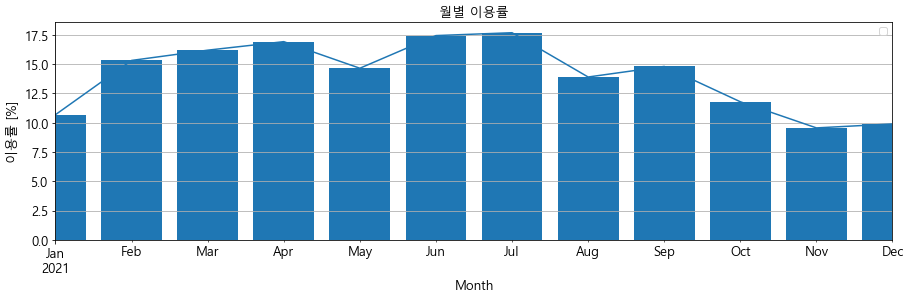

In [40]:
x = df_PV_Monthly['이용률']
x.plot(figsize=(15,4), fontsize = 13).bar(x=x.index, height=x.values)
plt.grid()
plt.legend([])
plt.xlabel('Month', fontsize = 13)
plt.ylabel('이용률 [%]', fontsize = 13)
plt.title('월별 이용률', fontsize = 13)

### 3.6 월별 발전량과 발전시간횟수 분석

#### 월별 발전량과 발전시간횟수

Text(0, 0.5, '발전시간횟수')

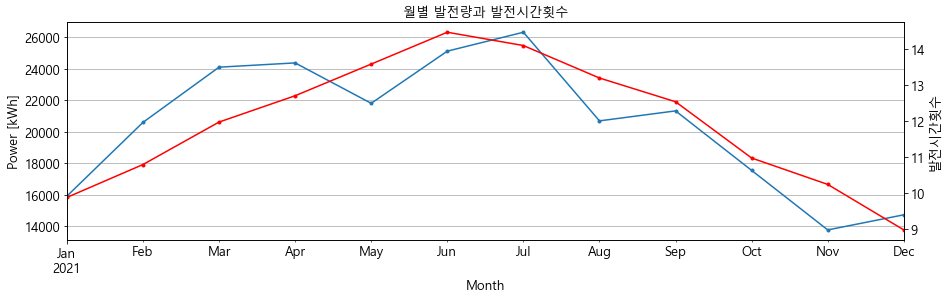

In [41]:
fig, ax1 = plt.subplots()
df_PV_Monthly['발전량'].plot(figsize=(15,4), fontsize = 13, style = '.-')
plt.grid()
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Power [kWh]', fontsize = 13)
plt.title('월별 발전량과 발전시간횟수', fontsize = 13)

ax2 = ax1.twinx()
df_PV_Monthly['일평균 발전시간횟수'].plot(figsize=(15,4), fontsize = 13, style = '.-', color = 'r')
plt.ylabel('발전시간횟수', fontsize = 13)

### 3.7 월별 발전량과 발전시간 분석

Text(0, 0.5, '발전시간 [hour]')

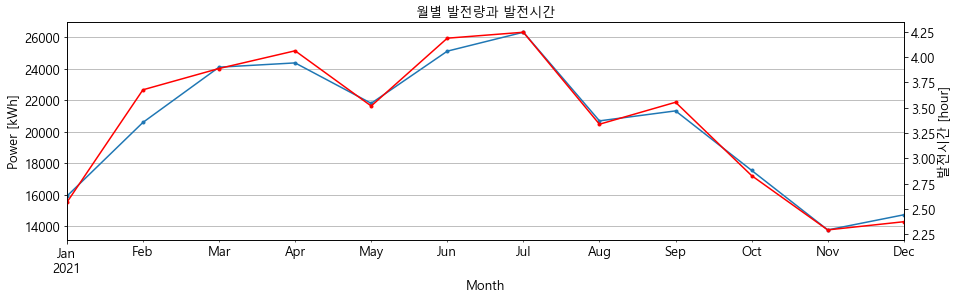

In [42]:
fig, ax1 = plt.subplots()
df_PV_Monthly['발전량'].plot(figsize=(15,4), fontsize = 13, style = '.-')
plt.grid()
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Power [kWh]', fontsize = 13)
plt.title('월별 발전량과 발전시간', fontsize = 13)

ax2 = ax1.twinx()
df_PV_Monthly['일평균 발전시간'].plot(figsize=(15,4), fontsize = 13, style = '.-', color = 'r')
plt.ylabel('발전시간 [hour]', fontsize = 13)

In [43]:
df_PV_Monthly

,발전량,일평균 발전량,일평균 발전시간횟수,일평균 발전시간,가동일,발전 가능량,이용률
일시,,,,,,,
2021-01-31,15906.484,15906.484,9.870968,2.565562,31,148800,10.689841
2021-02-28,20593.513,20593.513,10.785714,3.677413,28,134400,15.322554
2021-03-31,24103.523,24103.523,11.967742,3.887665,31,148800,16.198604
2021-04-30,24375.102,24375.102,12.700000,4.062517,30,144000,16.927154
2021-05-31,21808.537,21808.537,13.580645,3.517506,31,148800,14.656275
2021-06-30,25121.477,25121.477,14.466667,4.186913,30,144000,17.445470
2021-07-31,26322.998,26322.998,14.096774,4.245645,31,148800,17.690187
2021-08-31,20693.428,20693.428,13.193548,3.337650,31,148800,13.906874
2021-09-30,21326.921,21326.921,12.533333,3.554487,30,144000,14.810362


### 3.8 월별 발전량과 이용률 분석

Text(0, 0.5, '이용률 [%]')

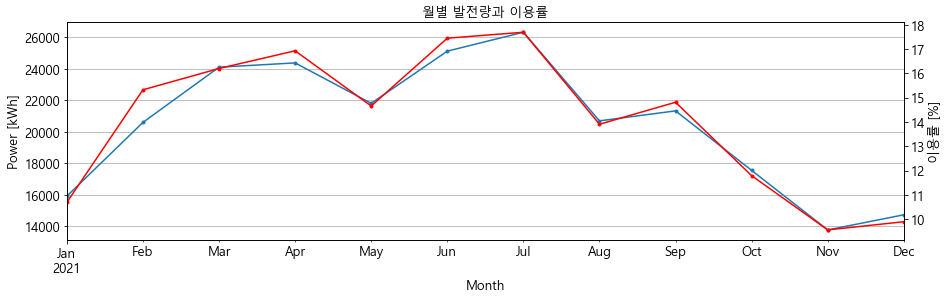

In [44]:
fig, ax1 = plt.subplots()
df_PV_Monthly['발전량'].plot(figsize=(15,4), fontsize = 13, style = '.-')
plt.grid()
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Power [kWh]', fontsize = 13)
plt.title('월별 발전량과 이용률', fontsize = 13)

ax2 = ax1.twinx()
df_PV_Monthly['이용률'].plot(figsize=(15,4), fontsize = 13, style = '.-', color = 'r')
plt.ylabel('이용률 [%]', fontsize = 13)

### 3.9 월별 기상 분석

#### 기온

In [45]:
Tem_Monthly = df['기온(°C)'].resample('D').mean().resample('M').mean()
Tem_Monthly

일시
2021-01-31    -2.074597
2021-02-28     2.088690
2021-03-31     7.670430
2021-04-30    13.145417
2021-05-31    16.126075
2021-06-30    21.597500
2021-07-31    27.230108
2021-08-31    25.509543
2021-09-30    22.725972
2021-10-31    16.052688
2021-11-30     8.811944
2021-12-31     1.274597
Freq: M, Name: 기온(°C), dtype: float64

#### 일사

In [46]:
Irr_Monthly = df['일사(MJ/m2)'].resample('D').sum().resample('M').mean()
Irr_Monthly

일시
2021-01-31     8.690323
2021-02-28    11.946786
2021-03-31    14.707742
2021-04-30    18.260000
2021-05-31    18.420000
2021-06-30    19.355667
2021-07-31    20.109355
2021-08-31    14.878710
2021-09-30    14.862000
2021-10-31    11.447097
2021-11-30     8.437333
2021-12-31     8.014516
Freq: M, Name: 일사(MJ/m2), dtype: float64

#### 강수량

In [47]:
Rai_Monthly = df['강수량(mm)'].resample('M').sum()
Rai_Monthly

일시
2021-01-31     20.8
2021-02-28      6.6
2021-03-31     93.4
2021-04-30    116.9
2021-05-31    191.5
2021-06-30     45.4
2021-07-31     84.2
2021-08-31    265.0
2021-09-30    129.8
2021-10-31     31.6
2021-11-30     79.0
2021-12-31      7.6
Freq: M, Name: 강수량(mm), dtype: float64

#### 전운량

In [49]:
Clo_Monthly = df['전운량(10분위)'].resample('D').sum().resample('M').mean()
Clo_Monthly

일시
2021-01-31     99.354839
2021-02-28     98.214286
2021-03-31    117.870968
2021-04-30    121.200000
2021-05-31    132.645161
2021-06-30    149.000000
2021-07-31    134.870968
2021-08-31    163.774194
2021-09-30    134.366667
2021-10-31    113.645161
2021-11-30    104.600000
2021-12-31     76.225806
Freq: M, Name: 전운량(10분위), dtype: float64

#### 적설

In [50]:
Sno_Monthly = df['적설(cm)'].resample('M').sum()
Sno_Monthly

일시
2021-01-31    109.0
2021-02-28    138.5
2021-03-31      3.0
2021-04-30      0.0
2021-05-31      0.0
2021-06-30      0.0
2021-07-31      0.0
2021-08-31      0.0
2021-09-30      0.0
2021-10-31      0.0
2021-11-30      0.0
2021-12-31    111.4
Freq: M, Name: 적설(cm), dtype: float64

#### 새로운 데이터프레임으로 통합

In [51]:
df_Weather_Monthly = pd.DataFrame(Tem_Monthly.values, index=Tem_Monthly.index, columns=['기온(°C)'])
df_Weather_Monthly['일사(MJ/m2)'] = Irr_Monthly
df_Weather_Monthly['전운량(10분위)'] = Clo_Monthly
df_Weather_Monthly['강수량(mm)'] = Rai_Monthly
df_Weather_Monthly['적설(cm)'] = Sno_Monthly
df_Weather_Monthly

,기온(°C),일사(MJ/m2),전운량(10분위),강수량(mm),적설(cm)
일시,,,,,
2021-01-31,-2.074597,8.690323,99.354839,20.8,109.0
2021-02-28,2.088690,11.946786,98.214286,6.6,138.5
2021-03-31,7.670430,14.707742,117.870968,93.4,3.0
2021-04-30,13.145417,18.260000,121.200000,116.9,0.0
2021-05-31,16.126075,18.420000,132.645161,191.5,0.0
2021-06-30,21.597500,19.355667,149.000000,45.4,0.0
2021-07-31,27.230108,20.109355,134.870968,84.2,0.0
2021-08-31,25.509543,14.878710,163.774194,265.0,0.0
2021-09-30,22.725972,14.862000,134.366667,129.8,0.0


#### 시각화

Text(0, 0.5, '적설(cm)')

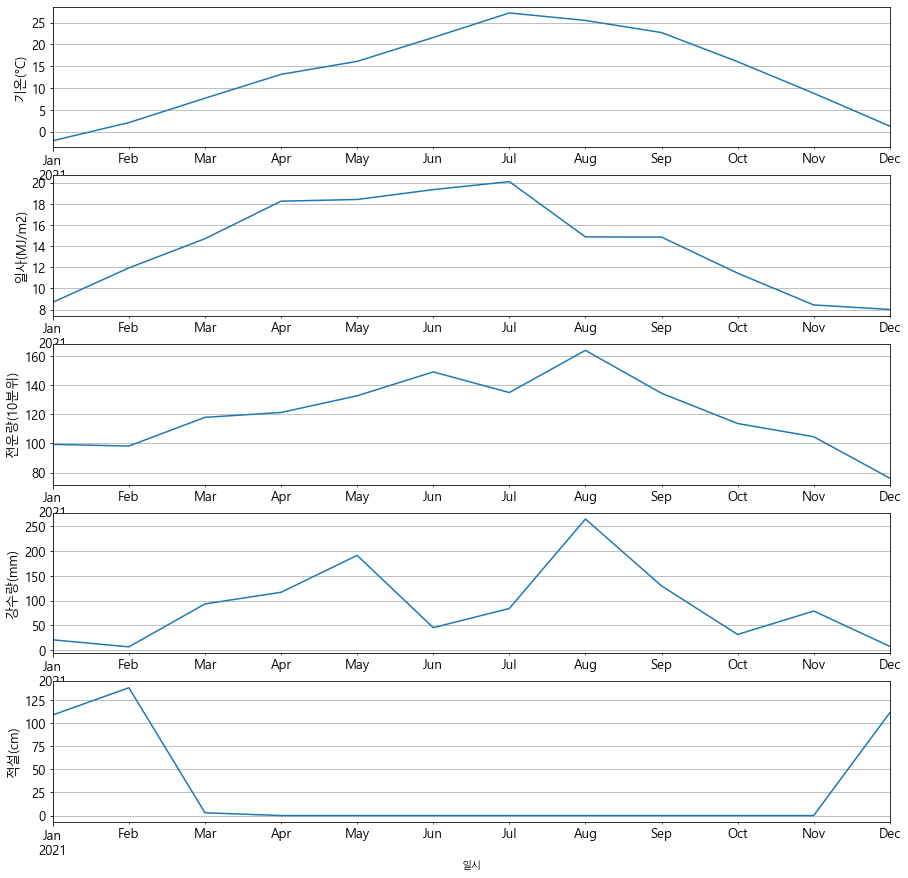

In [52]:
plt.subplots(5,1)
plt.subplot(5,1,1)
df_Weather_Monthly['기온(°C)'].plot(figsize=(15,15), fontsize = 13)
plt.grid()
plt.ylabel('기온(°C)', fontsize = 13)

plt.subplot(5,1,2)
df_Weather_Monthly['일사(MJ/m2)'].plot(fontsize = 13)
plt.grid()
plt.ylabel('일사(MJ/m2)', fontsize = 13)

plt.subplot(5,1,3)
df_Weather_Monthly['전운량(10분위)'].plot(fontsize = 13)
plt.grid()
plt.ylabel('전운량(10분위)', fontsize = 13)

plt.subplot(5,1,4)
df_Weather_Monthly['강수량(mm)'].plot(fontsize = 13)
plt.grid()
plt.ylabel('강수량(mm)', fontsize = 13)

plt.subplot(5,1,5)
df_Weather_Monthly['적설(cm)'].plot(fontsize = 13)
plt.grid()
plt.ylabel('적설(cm)', fontsize = 13)